### HW2 Solution ###

In [1]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from scipy.stats import multivariate_normal

In [2]:
# Read in the train and test datasets into a Pandas DataFrame
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(f'Train Data:\n {train.head()}')
print(f'Test Data:\n{test.head()}')

Train Data:
          x1        x2
0 -0.426805 -0.538380
1 -0.965742 -0.331686
2  0.273106  0.188718
3 -1.646928 -1.449253
4  0.304448  0.598405
Test Data:
   x1  x2
0   0  -2
1  -2   1


Text(0.5, 1.0, 'x1 and x2')

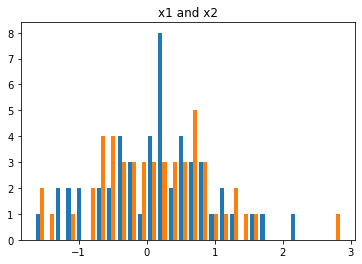

In [3]:
# Plot a simple Histogram to check if data looks somewhat gaussian

plot.hist([train['x1'],train['x2']], 30)
plot.title('x1 and x2')
# X1 seems gaussian, X2 seems to be less so but close

#### <u>Case 1: Where the 2 features are independent</u> ####
In this case we can calculate the individual pdf's and then multiply them to get total pdf.

In [4]:
# Create a copy of X and X_test
X = train.copy()
X_test = test.copy()


Text(0, 0.5, 'x2')

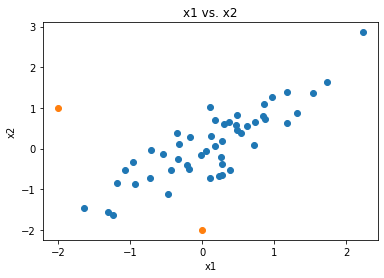

In [28]:
# Plot and visualize the data
plot.scatter(X['x1'],X['x2'])
plot.scatter(X_test['x1'],X_test['x2'])
plot.title('x1 vs. x2')
plot.xlabel('x1')
plot.ylabel('x2')
# orange for test data
# blue for train data

In [6]:
# Write a function to calulcate indiviudal feature pdf's and return a total pdf
def pdf_calc(X, mean, std):
    # pd is the probability density, calculated by  matrix
    pd = 1/(std * np.sqrt(2 * np.pi)) * np.exp(-(X - mean)**2 / (2 * std**2))
    pdf = pd['x1'] * pd['x2']
    return pdf


In [7]:
# Calculate the parameters required to estimate the probability density factors - mean and std
X_mean = X.mean()
X_std = X.std()
print(f'X mean:\n{X_mean}\nX_std:\n{X_std}')
# df.std() and df.mean() used to do column(feature) - wise arithmetic

X mean:
x1    0.142955
x2    0.123187
dtype: float64
X_std:
x1    0.817407
x2    0.871748
dtype: float64


In [8]:
# Call the function, calculate pdf's and add it to a column in the dataframe you are working with 
X['pdf'] = pdf_calc(X, X_mean, X_std)
print(f'New dataframe with pdf:\n{X}')

New dataframe with pdf:
          x1        x2       pdf
0  -0.426805 -0.538380  0.131349
1  -0.965742 -0.331686  0.077693
2   0.273106  0.188718  0.219917
3  -1.646928 -1.449253  0.003993
4   0.304448  0.598405  0.188793
5   0.541074  0.372986  0.190392
6   0.235565 -0.663596  0.147680
7   1.732585  1.642965  0.007375
8   0.862517  1.104816  0.080423
9   1.180246  0.622178  0.084753
10 -1.303140 -1.548977  0.007420
11  0.279747 -0.378871  0.186588
12  0.477521  0.581217  0.178923
13  0.975711  1.259567  0.056835
14  0.626347  0.551252  0.166223
15  0.112260  1.018482  0.131719
16  0.266609 -0.216153  0.204700
17 -0.468483 -1.107194  0.062362
18  0.277364 -0.639810  0.150235
19  1.182778  1.402017  0.033907
20 -0.725086 -0.718460  0.079744
21  0.179444  0.052885  0.222406
22  1.542242  1.356557  0.018966
23  0.172644  0.701237  0.179154
24  0.105324 -0.734962  0.137437
25 -0.207630 -0.415379  0.168331
26  0.479966  0.825726  0.148268
27 -1.178574 -0.852609  0.032309
28  0.851511  0.791

In [9]:
# Pick an 'eps' value which does not detect any anomalies in the train set
min_pdf = X['pdf'].min()
print(f'Minimum PDF value: {min_pdf}')
eps = 6 * 10**-5
print(f'eps value: {eps}')
# eps > pdf for anamolies only


Minimum PDF value: 6.242751926437464e-05
eps value: 6.000000000000001e-05


In [10]:
# Get the total pdf value for the test set and it to the test dataframe
X_test['pdf'] = pdf_calc(X_test, X_test.mean(), X_test.std())
print(f'New test dataframe:\n {X_test}')

New test dataframe:
    x1  x2       pdf
0   0  -2  0.032177
1  -2   1  0.032177


In [11]:
# Detect the anomalies in the test set with the same eps
# Change it if requred till the 2 anomalies are detected and the misclassification in the train set is as minimum as possible

# Original eps value (.00006)
X_anamolies = X[X['pdf'] < eps]
X_anamolies = X_anamolies.append(X_test[X_test['pdf'] < eps])
print(f'Original eps Anamolies:\n{X_anamolies}')
# new eps in order to take into account for the x_test values being anamolies
eps = .0322
X_anamolies = X[X['pdf'] < eps]
X_anamolies = X_anamolies.append(X_test[X_test['pdf'] < eps])
print(f'New eps Anamolies:\n{X_anamolies}')



Original eps Anamolies:
Empty DataFrame
Columns: [x1, x2, pdf]
Index: []
New eps Anamolies:
          x1        x2       pdf
3  -1.646928 -1.449253  0.003993
7   1.732585  1.642965  0.007375
10 -1.303140 -1.548977  0.007420
22  1.542242  1.356557  0.018966
37  2.228768  2.859645  0.000062
41 -1.244211 -1.625102  0.007084
0   0.000000 -2.000000  0.032177
1  -2.000000  1.000000  0.032177


Text(0.5, 1.0, 'mesh grid')

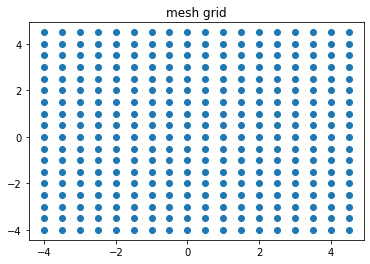

In [12]:
# Prepare data for visualizing on a contour plot
# Create a meshgrid
x = np.arange(-4,5,.5)
y = np.arange(-4,5,.5)
X1, Y1 = np.meshgrid(x,y)
plot.scatter(X1,Y1)
plot.title('mesh grid')

#### Preparing the data for the Contour plots ####

1. We have to compute the pdf(Z) values for every data point in the meshgrid.

2. We can do the above by putting all the data points Xl and Yl in 2 columns and then computing pdf like we did before.

3. We then have to reshape Z to the same shape as the meshgrid.

In [13]:
# Flatten and convert the Xl and Yl points to a numpy arrary with 2 columns
# np.dstack Stacks arrays in sequence depth wise
z_array = np.dstack((X1.flatten(),Y1.flatten())).reshape(-1,2)

# Put the array into a pandas dataframe

z_frame = pd.DataFrame(z_array, columns=['x1','x2'])

# Compute total pdf and reshape Z
Z = pdf_calc(z_frame, X_mean, X_std)
Z = np.array(Z).reshape(X1.shape)
# print(Z.shape)



Text(0, 0.5, 'x2')

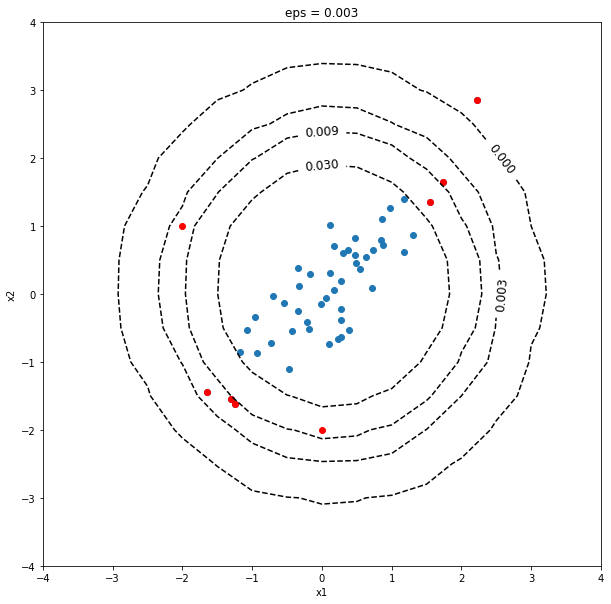

In [25]:
# Visualize normal data, all anomlaies using Contour plots
# Mark anomalies in red

# used to plot information 
plot.figure(figsize=(10,10))
plot.title(f'eps = {eps}')
plot.scatter(X['x1'],X['x2'])
plot.scatter(X_anamolies['x1'],X_anamolies['x2'],c='r')
levels = [0,0.0003,0.003,0.009,0.03]
contour = plot.contour(X1,Y1,Z,levels,linestyles='dashed',colors='black')
plot.clabel(contour, inline=True, fontsize=12)
plot.xlim(-4,4)
plot.ylim(-4,4)
plot.xlabel("x1")
plot.ylabel("x2")


### Case for multi-variate data with orientation ###

Formula for multi-variate  $ p(x:\mu,\Sigma) = \frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}e^-(-\frac{1}{2}(X-\mu)^T\Sigma^-1(X-\mu)) $

##### Repeat the same process but this time assuming there is covariance in the data ####

In [15]:
# New DataFrames
x_mv = train.copy()
x_mv_test = test.copy()
print(f'Train Data:\n{x_mv}\nTest Data:\n{x_mv_test}')

Train Data:
          x1        x2
0  -0.426805 -0.538380
1  -0.965742 -0.331686
2   0.273106  0.188718
3  -1.646928 -1.449253
4   0.304448  0.598405
5   0.541074  0.372986
6   0.235565 -0.663596
7   1.732585  1.642965
8   0.862517  1.104816
9   1.180246  0.622178
10 -1.303140 -1.548977
11  0.279747 -0.378871
12  0.477521  0.581217
13  0.975711  1.259567
14  0.626347  0.551252
15  0.112260  1.018482
16  0.266609 -0.216153
17 -0.468483 -1.107194
18  0.277364 -0.639810
19  1.182778  1.402017
20 -0.725086 -0.718460
21  0.179444  0.052885
22  1.542242  1.356557
23  0.172644  0.701237
24  0.105324 -0.734962
25 -0.207630 -0.415379
26  0.479966  0.825726
27 -1.178574 -0.852609
28  0.851511  0.791595
29 -0.541162 -0.126902
30  0.488381  0.450003
31  1.311991  0.872105
32 -1.078333 -0.536638
33 -0.174402  0.291878
34 -0.179936 -0.510345
35 -0.704203 -0.035442
36 -0.342716  0.376844
37  2.228768  2.859645
38 -0.008782 -0.154090
39  0.392519 -0.526037
40  0.117651  0.302447
41 -1.244211 -1.625102

Text(0.5, 0, 'x1')

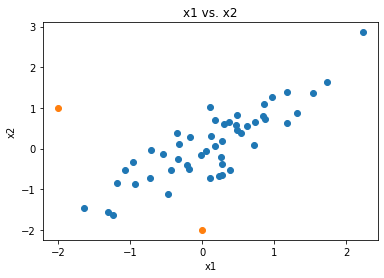

In [26]:
# Plot data to see covariance
plot.scatter(x_mv['x1'],x_mv['x2'])
plot.scatter(x_mv_test['x1'],x_mv_test['x2'])
plot.title('x1 vs. x2')
plot.ylabel('x2')
plot.xlabel('x1')
# orange for test data
# blue for train data

In [17]:
# Mean and Covariance
x_mv_mean = x_mv.mean()
x_mv_cov = x_mv.cov()

print(f'Train Data\nMean:\n{x_mv_mean}\nCovariance:\n{x_mv_cov}')


Train Data
Mean:
x1    0.142955
x2    0.123187
dtype: float64
Covariance:
          x1        x2
x1  0.668154  0.610888
x2  0.610888  0.759945


In [18]:
# multivariate normal pdf calculated and added to dataframe
# both test and train
x_mv['pdf'] = multivariate_normal.pdf(x_mv, x_mv_mean, x_mv_cov)
x_mv_test['pdf'] = multivariate_normal.pdf(x_mv_test, x_mv_mean, x_mv_cov)

print(f'New DataFrame with PDF:\n {x_mv}')
print(f'Test Dataframe:\n{x_mv_test}')

New DataFrame with PDF:
           x1        x2       pdf
0  -0.426805 -0.538380  0.323973
1  -0.965742 -0.331686  0.079653
2   0.273106  0.188718  0.425352
3  -1.646928 -1.449253  0.039060
4   0.304448  0.598405  0.325971
5   0.541074  0.372986  0.373048
6   0.235565 -0.663596  0.065433
7   1.732585  1.642965  0.064766
8   0.862517  1.104816  0.227023
9   1.180246  0.622178  0.117468
10 -1.303140 -1.548977  0.066931
11  0.279747 -0.378871  0.161157
12  0.477521  0.581217  0.376706
13  0.975711  1.259567  0.182117
14  0.626347  0.551252  0.364071
15  0.112260  1.018482  0.052221
16  0.266609 -0.216153  0.258059
17 -0.468483 -1.107194  0.107133
18  0.277364 -0.639810  0.061006
19  1.182778  1.402017  0.147864
20 -0.725086 -0.718460  0.245453
21  0.179444  0.052885  0.422005
22  1.542242  1.356557  0.099704
23  0.172644  0.701237  0.204102
24  0.105324 -0.734962  0.080412
25 -0.207630 -0.415379  0.351674
26  0.479966  0.825726  0.270840
27 -1.178574 -0.852609  0.102681
28  0.851511  0.79

In [19]:
# finding value of eps
print(f'Min train value = {x_mv["pdf"].min()}')
print(f'Max train value = {x_mv["pdf"].max()}')
eps = .003
print(f'eps = {eps}')

Min train value = 0.0030320905723394353
Max train value = 0.42535185017605215
eps = 0.003


In [20]:
 # eps comparison with test data
x_mv_anamolies = x_mv[x_mv['pdf']<eps]
x_mv_anamolies = x_mv_anamolies.append(x_mv_test[x_mv_test['pdf']<eps])
print(f'Anamolies:\n{x_mv_anamolies}')

Anamolies:
    x1   x2           pdf
0  0.0 -2.0  2.241909e-05
1 -2.0  1.0  2.972858e-11


Text(0.5, 1.0, 'meshgrid')

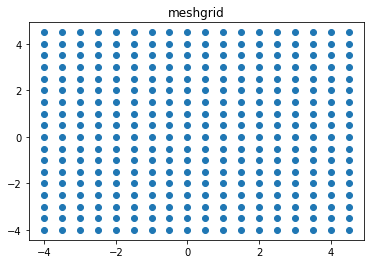

In [21]:
# Making meshgrid

x2 = np.arange(-4,5,.5)
y2 = np.arange(-4,5,.5)
X2, Y2 = np.meshgrid(x2,y2)
plot.scatter(X2,Y2)
plot.title('meshgrid')


In [22]:
# Flatten and create n x 2 matrix
# Turn matrix into dataframe
z_array2 = np.dstack((X2.flatten(),Y2.flatten())).reshape(-1,2)
z_frame2 = pd.DataFrame(z_array2,columns=['x1','x2'])
# print(f'Z dataframe:\n{z_frame2}')

Z2 = multivariate_normal.pdf(z_frame2, x_mv_mean, x_mv_cov) 
Z2 = np.array(Z2).reshape(X2.shape)

# print(Z2)
print(Z2.shape)

(18, 18)


Text(0, 0.5, 'x2')

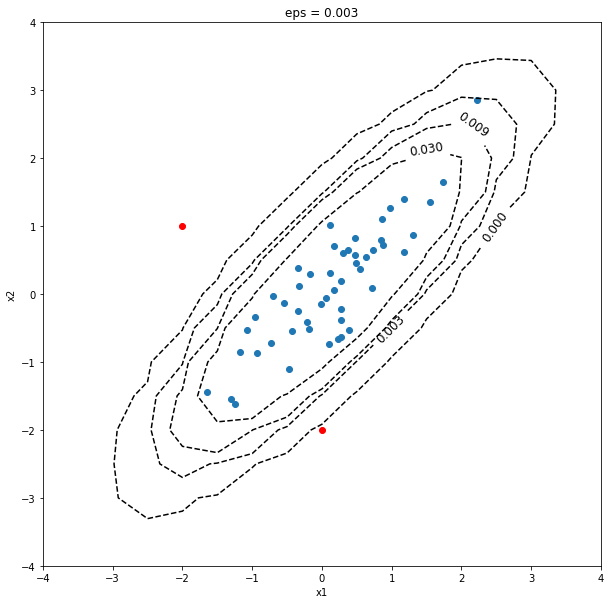

In [23]:
# Contour plot and data points
plot.figure(figsize=(10,10))
plot.title(f'eps = {eps}')
plot.scatter(x_mv['x1'],x_mv['x2'])
plot.scatter(x_mv_anamolies['x1'],x_mv_anamolies['x2'],c='r')
levels = [0,0.0003,0.003,0.009,0.03]
contour2 = plot.contour(X2,Y2,Z2,levels,linestyles='dashed',colors='black')
plot.clabel(contour2, inline=True, fontsize=12)
plot.xlim(-4,4)
plot.ylim(-4,4)
plot.xlabel("x1")
plot.ylabel("x2")


### Comments/Conclusions - Observations, assumptions and results. ###
From observing the histogram, x1 and x2 could already be seen to have some data points which were were far away from the center of the distribution, notably towards the top right. From this, I assumed that it might potentially classify these points as anamolies since the calculation for pdf would not account for covariance for our an independent feature model. However, I was wrong. This could be seen when the initial eps was determined as being 6 * 10^-6, but then had to be changed to .0322 to account for the test data being the 'true' anamolies. The original eps led to no anamolies while the new eps caused 8 points to be classified as anamolies, of which 6 were false. I believe this happened because the pdf values considered are based on the pdf of x1 and x2 multiplied together, meaning that any x1 or x2 value far enough away from the average will cause the pdf of that overall point to drop drastically. Any point that was significantly 'far' from the mean in x1 or x2 would be flagged as an anamoly as a result. However, because the two test points were closer by standard deviation and mean than the edge points, everything that was 'further' ended up being classified as anamolies.

In the second approach, the covariance was taken into account in a multivariate approach. This means as long as data points followed the 'trend' of the rest of the data and was not significantly distant from the average, it would not be classified as an anamoly. As a result, the eps calculated from the train data was significantly higher than that of the test values. This is because the test points diverged significantly in x2, as the other data points follow a positive correlation with a slope about 1. As a result, both the test points were considered anamolies with no train points being considered anamolies.

### What I've Learned and Challenges ###
When I set out on this homework, I did not fully understand the idea of how anamolies were to be calculated. From lecture I knew the general process, but I had thought it was going to a more along the lines of a simple distribution curve detection algorithm. However, after seeing how the first approach mischaracterized almost a tenth of total points using such a method, I knew I was wrong. After going through the multivariate method, I could see how it was more of a focus on how closely data aligned with a percieved pattern and a little educated guesswork to determine the line between no problem and anamoly. Aditionally, I have gotten better at setting up and using data since the first homework, as I have now gotten used to pandas, numpy, and matlab for python. Lastly, some of the challenges I've faced is remembering the next step in the process and what function calls to use. When I was going through the second part without guidance, I would frequently have to look back at my first part for the meshgrid and plotting creation. However, it has gotten progressively easier then before after having gone through multiple times.  